Model_Building TEAM_ID - PNT2022TMID25718

Import necessary package

In [2]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)

(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Data pre processing

In [5]:
y_train[0]

5

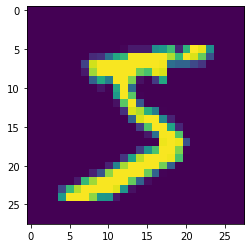

In [6]:
plt.imshow(X_train[0])

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
Y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))


Compiling the model

In [12]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5

1875/1875 [==============================] - 196s 104ms/step - loss: 0.2114 - accuracy: 0.9530 - val_loss: 0.0860 - val_accuracy: 0.9739

Epoch 2/5

1875/1875 [==============================] - 202s 108ms/step - loss: 0.0678 - accuracy: 0.9796 - val_loss: 0.1017 - val_accuracy: 0.9751

Epoch 3/5

1875/1875 [==============================] - 197s 105ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0876 - val_accuracy: 0.9790

Epoch 4/5

1875/1875 [==============================] - 202s 108ms/step - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.0725 - val_accuracy: 0.9812

Epoch 5/5

1875/1875 [==============================] - 196s 104ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.1061 - val_accuracy: 0.9749


Test the model

In [14]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 

[0.10613072663545609, 0.9749000072479248]


In [15]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 93ms/step

[[9.9039808e-14 1.7801291e-17 2.4331301e-09 5.1562615e-10 2.6416533e-15

  9.6221535e-16 1.8084108e-24 1.0000000e+00 3.2786626e-14 6.7406480e-10]

 [5.2280425e-16 1.4731727e-12 1.0000000e+00 1.9810487e-11 3.6309416e-18

  1.7567800e-18 4.1256623e-08 3.1735288e-19 3.5455400e-10 4.5615819e-23]

 [3.9027423e-08 9.9997389e-01 4.7386902e-06 4.2051904e-12 1.8228963e-07

  3.9746135e-07 1.9909536e-09 1.0973835e-11 2.0772874e-05 2.1399367e-13]

 [9.9999607e-01 5.6394082e-13 2.5004380e-07 1.9577358e-12 9.8116532e-12

  6.2192071e-11 2.3564528e-06 9.4811000e-14 1.3014859e-06 6.0907044e-09]]


In [16]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
